# Logistic Regression

## Insurance dataset

In [1]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data visualization
%matplotlib inline

In [3]:
# filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing Data
claimants = pd.read_csv("/home/shashanksoni092/DataScienceWorkspace/DataScienceProjectsPdf/LogisticRegression/claimants.csv")

In [5]:
claimants.shape

(1340, 7)

In [6]:
# view top 5 records in dataset
claimants.head(3)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330


In [7]:
claimants.tail()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177
1339,34153,1,1.0,1.0,0.0,30.0,0.688


In [8]:
claimants.columns # Displays Variable Names

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS'],
      dtype='object')

In [9]:
# removing CASENUM
claimants.drop(["CASENUM"],axis=1) 
claimants.drop(["CASENUM"],axis=1,inplace=True)

In [10]:
claimants.head(25)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
5,0,1.0,1.0,0.0,35.0,0.309
6,0,0.0,1.0,0.0,9.0,3.538
7,0,1.0,1.0,0.0,34.0,4.881
8,1,1.0,1.0,0.0,60.0,0.874
9,1,0.0,1.0,0.0,NaN,0.350


In [11]:
# usage lambda and apply function
# apply function => we use to apply custom function operation on 
# each column
# lambda just an another syntax to apply a function on each value 
# without using for loop 
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

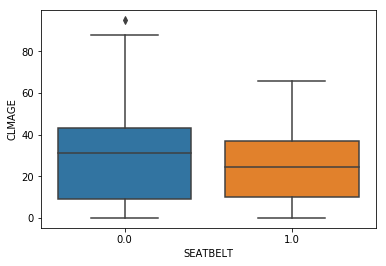

In [12]:
# importing seaborn library
import seaborn as sns
sns.boxplot(x="SEATBELT",y="CLMAGE",data=claimants)

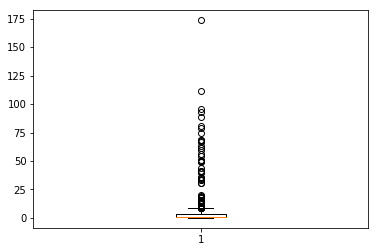

In [13]:
# boxplot
plt.boxplot(claimants['LOSS'],vert = True)
plt.show()

In [14]:
# describe the dataset
claimants.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [15]:
# mean value for all columns using lambda
claimants.apply(lambda a:a.mean())

ATTORNEY     0.488806
CLMSEX       0.558735
CLMINSUR     0.907621
SEATBELT     0.017028
CLMAGE      28.414422
LOSS         3.806307
dtype: float64

In [16]:
# mean value for all columns
claimants.mean()

ATTORNEY     0.488806
CLMSEX       0.558735
CLMINSUR     0.907621
SEATBELT     0.017028
CLMAGE      28.414422
LOSS         3.806307
dtype: float64

In [17]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:
#Imputating the missing values with most repeated values in that column

In [18]:
# lambda x:x.fillna(x.value_counts().index[0]) 
# the above line gives you the most repeated value in each column

In [19]:
# gets you the most occuring value in ATTORNEY column
claimants.ATTORNEY.value_counts()
#claimants.ATTORNEY.mode()
claimants.ATTORNEY.value_counts().index[0]
#claimants.ATTORNEY.head()

0

In [20]:
# gets you the most occuring value in CLMSEX column
claimants.CLMSEX.value_counts()
claimants.CLMSEX.value_counts().index[0] 
#claimants.CLMSEX.head()

1.0

In [21]:
claimants.CLMAGE.value_counts()
claimants.CLMAGE.value_counts().index[0] 
claimants.CLMAGE.mode()

0    10.0
dtype: float64

In [22]:
# filling the missing value with most occuring value    
#claimants.iloc[:,0:1339] = claimants.iloc[:,0:1339].apply(lambda x:x.fillna(x.value_counts().index[0]))
claimants.isnull().sum()
#claimants.SEATBELT = claimants.SEATBELT.fillna(claimants.SEATBELT.value_counts().index[0])

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [23]:
# select only first 5 columns
claimants.iloc[:,0:3].columns
#claimants.columns

Index(['ATTORNEY', 'CLMSEX', 'CLMINSUR'], dtype='object')

In [24]:
# filling the missing values with the mean value of the column
claimants.CLMAGE = claimants.CLMAGE.fillna(claimants.CLMAGE.mean())

In [33]:
# filling the missing value with mean of that column using lambda
claimants.iloc[:,0:] = claimants.iloc[:,0:].apply(lambda x:x.fillna(x.median()))

In [35]:
# Checking if we have na values or not 
print(claimants.isnull().sum()) # No null values
from scipy import stats
import scipy.stats as st

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64


In [36]:
# Model building
import statsmodels.formula.api as sm
logit_model = sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT',data = claimants).fit()

Optimization terminated successfully.
         Current function value: 0.609131
         Iterations 7


In [37]:
# summary
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                            5
Date:                Fri, 26 Oct 2018   Pseudo R-squ.:                  0.1209
Time:                        15:22:36   Log-Likelihood:                -816.24
converged:                       True   LL-Null:                       -928.48
                                        LLR p-value:                 1.620e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1493      0.226     -0.660      0.509      -0.592       0.294
CLMAGE         0.0066      0.003      2.058      0.040       0.000       0.013
LOSS          -0.3228      0.029    -10.962      0.000      -0.381      -0.265
CLMINSUR       0.5284      0.210      2.516      0.012       0.117       0.940
CLMSEX         0.3204      0.120      2.674      0.008       0.086       0.555
SEATBELT      -0.6718      0.522     -1.286      0.198      -1.696       0.352
==============================================================================
"""

In [38]:
# prediction using logit_model
y_pred = logit_model.predict(claimants)

In [39]:
y_pred.head()

0    0.000026
1    0.500422
2    0.575767
3    0.474743
4    0.637341
dtype: float64

In [40]:
# Creating new column for storing predicted class of Attorney
claimants["pred_prob"] = y_pred
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,pred_prob
0,0,0.0,1.0,0.0,50.0,34.940,0.000026
1,1,1.0,0.0,0.0,18.0,0.891,0.500422
2,1,0.0,1.0,0.0,5.0,0.330,0.575767
3,0,0.0,1.0,1.0,31.0,0.037,0.474743
4,1,0.0,1.0,0.0,30.0,0.038,0.637341


In [41]:
# filling all the cells with zeroes
claimants["Att_val"] = 0
claimants.head(10)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,pred_prob,Att_val
0,0,0.0,1.0,0.0,50.000000,34.940,0.000026,0
1,1,1.0,0.0,0.0,18.000000,0.891,0.500422,0
2,1,0.0,1.0,0.0,5.000000,0.330,0.575767,0
3,0,0.0,1.0,1.0,31.000000,0.037,0.474743,0
4,1,0.0,1.0,0.0,30.000000,0.038,0.637341,0
5,0,1.0,1.0,0.0,35.000000,0.309,0.696260,0
6,0,0.0,1.0,0.0,9.000000,3.538,0.330959,0
7,0,1.0,1.0,0.0,34.000000,4.881,0.342348,0
8,1,1.0,1.0,0.0,60.000000,0.874,0.692394,0
9,1,0.0,1.0,0.0,28.414422,0.350,0.611285,0


In [42]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
claimants.loc[y_pred >=0.5,"Att_val"] = 1
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,pred_prob,Att_val
0,0,0.0,1.0,0.0,50.0,34.940,0.000026,0
1,1,1.0,0.0,0.0,18.0,0.891,0.500422,1
2,1,0.0,1.0,0.0,5.0,0.330,0.575767,1
3,0,0.0,1.0,1.0,31.0,0.037,0.474743,0
4,1,0.0,1.0,0.0,30.0,0.038,0.637341,1


In [43]:
# importing libraries
from sklearn.metrics import classification_report
classification_report(claimants.Att_val,claimants.ATTORNEY)

'             precision    recall  f1-score   support\n\n          0       0.64      0.74      0.69       587\n          1       0.77      0.67      0.72       753\n\navg / total       0.71      0.70      0.70      1340\n'

In [44]:
# confusion matrix 
confusion_matrix = pd.crosstab(claimants['ATTORNEY'],claimants.Att_val)
confusion_matrix

Att_val,0,1
ATTORNEY,,
0,436,249
1,151,504


In [45]:
# accuracy
accuracy = (435+506)/(1340)
accuracy  # 70.14
claimants.shape

(1340, 8)

In [46]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(claimants.ATTORNEY, y_pred)

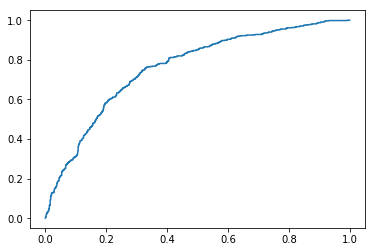

In [47]:
# the above function is applicable for binary classification class 

plt.plot(fpr,tpr)
#plt.xlabel("False Positive")
#plt.ylabel("True Positive")
 
#roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 

In [48]:
### Dividing data into train and test data sets
claimants.drop("Att_val",axis=1,inplace=True)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# splitting training set and test set
train, test = train_test_split(claimants,test_size=0.3)

In [51]:
# checking na values 
train.isnull().sum()
test.isnull().sum()

ATTORNEY     0
CLMSEX       0
CLMINSUR     0
SEATBELT     0
CLMAGE       0
LOSS         0
pred_prob    0
dtype: int64

In [52]:
# Building a model on train data set 

train_model = sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT',data = train).fit()

Optimization terminated successfully.
         Current function value: 0.612313
         Iterations 8


In [53]:
# summary
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                  938
Model:                          Logit   Df Residuals:                      932
Method:                           MLE   Df Model:                            5
Date:                Fri, 26 Oct 2018   Pseudo R-squ.:                  0.1163
Time:                        15:28:16   Log-Likelihood:                -574.35
converged:                       True   LL-Null:                       -649.96
                                        LLR p-value:                 7.349e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1372      0.277     -0.495      0.620      -0.680       0.406
CLMAGE         0.0037      0.004      0.983      0.325      -0.004       0.011
LOSS          -0.2947      0.034     -8.700      0.000      -0.361      -0.228
CLMINSUR       0.4865      0.261      1.861      0.063      -0.026       0.999
CLMSEX         0.4360      0.143      3.059      0.002       0.157       0.715
SEATBELT      -0.6615      0.638     -1.037      0.300      -1.912       0.589
==============================================================================
"""

In [55]:
# prediction using the model
train_pred = train_model.predict(train.iloc[:,1:])
train_pred

432     0.275519
452     0.659276
1064    0.586881
402     0.009204
1175    0.452124
911     0.152373
521     0.642318
760     0.506567
439     0.357815
1140    0.646147
684     0.227587
459     0.677090
32      0.551086
156     0.000079
463     0.520316
573     0.471137
196     0.349149
245     0.460984
126     0.601269
1063    0.695268
1262    0.585519
1243    0.581622
1271    0.353729
1030    0.257789
884     0.123751
979     0.250353
160     0.387171
1314    0.585113
60      0.709087
395     0.661090
          ...   
1234    0.600521
465     0.640126
526     0.226961
690     0.568335
557     0.573060
157     0.000015
705     0.580223
115     0.390112
668     0.505213
111     0.687225
1228    0.496955
482     0.652059
397     0.520762
1110    0.481227
1229    0.673261
923     0.656518
886     0.083679
1076    0.673597
188     0.623720
1214    0.688613
1289    0.329023
765     0.444387
116     0.660496
1024    0.691000
542     0.418355
1007    0.554913
633     0.593240
852     0.5275

In [56]:
# Creating new column for storing predicted class of Attorney

# filling all the cells with zeroes
train["train_pred"] = np.zeros(938)

In [57]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
train.loc[train_pred>0.5,"train_pred"] = 1

In [58]:
# confusion matrix 
confusion_matrix = pd.crosstab(train['ATTORNEY'],train.train_pred)
confusion_matrix

train_pred,0.0,1.0
ATTORNEY,,
0,306,173
1,107,352


In [59]:
# accuracy
accuracy_train = (436+504)/(1340) # 70.14
accuracy_train

0.7014925373134329

In [60]:
# Prediction on Test data set

test_pred = train_model.predict(test)

In [ ]:
# Creating new column for storing predicted class of Attorney

In [61]:
# filling all the cells with zeroes
test["test_pred"] = np.zeros(402)

In [62]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
test.loc[test_pred>0.5,"test_pred"] = 1

In [63]:
# confusion matrix 
confusion_matrix = pd.crosstab(test['ATTORNEY'],test.test_pred)
confusion_matrix

test_pred,0.0,1.0
ATTORNEY,,
0,131,75
1,42,154


In [64]:
# accuracy
accuracy_test = (126+161)/(402) # 71.39
accuracy_test

0.7139303482587065